# <center> Object Detection <center>

Object detection, regardless of whether performed via deep learning or other computer
vision techniques, builds on image classification model and seeks to localize precisely 
where in the image each object appears. When performing object detection, given an input 
image, we wish to obtain the object bounding box, the class or the label the object belongs 
to and the probability of the object belonging to the predicted class.

### Question:
Question:
Implement a pre-trained model such as RCNN or YOLO for the task of object detection. You 
may detect vehicles or humans given an image. Now implement the same on a video. For 
each frame of the video, draw the bounding box on the image and then store the results in an 
array and convert the final output back into a video

### Importing Libraries

In [42]:
import cv2
import matplotlib.pyplot as plt

In [43]:
config_file=r"C:\Users\HP\Desktop\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model=r"C:\Users\HP\Desktop\ssd_mobilenet_v3_large_coco_2020_01_14\frozen_inference_graph.pb"


In [44]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [45]:
classLabels=[]
file_name=r"C:\Users\HP\Desktop\Labels.txt"
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')
    

In [46]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [47]:
print(len(classLabels))

80


In [48]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000019EAA1AA950>

### Read an Image

In [56]:
img=cv2.imread(r"C:\Users\HP\Downloads\pexels-mike-bird-120049.jpg")

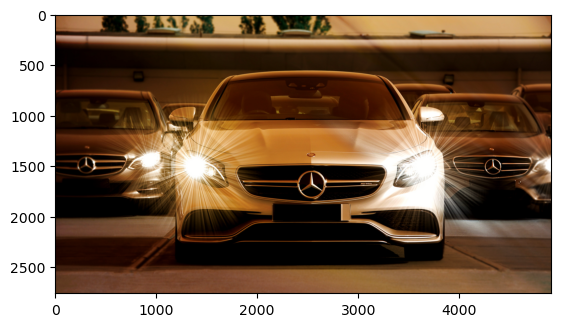

In [57]:
plt.imshow(img)

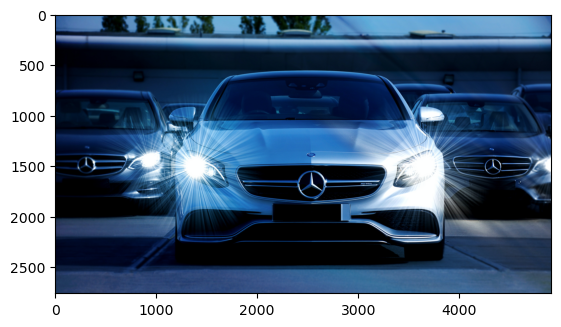

In [58]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [59]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [60]:
print(ClassIndex)

[3 3 3 3 3 3]


In [65]:
font_scale=20
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex,confidence,bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=30)

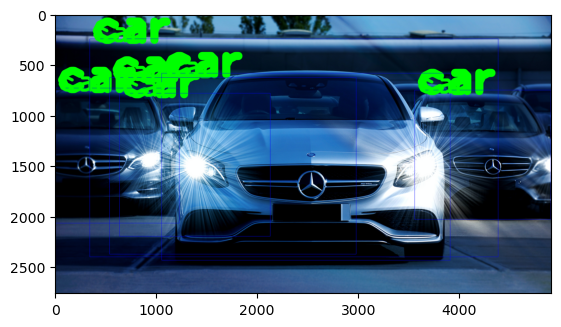

In [66]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Video Demo

In [37]:
import cv2

cap = cv2.VideoCapture(r"C:\Users\HP\Downloads\pexels_videos_2053100 (2160p).mp4")

# Check if the video is captured correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise Exception("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex, confidence, bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font,
                            fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow("Object detection", frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


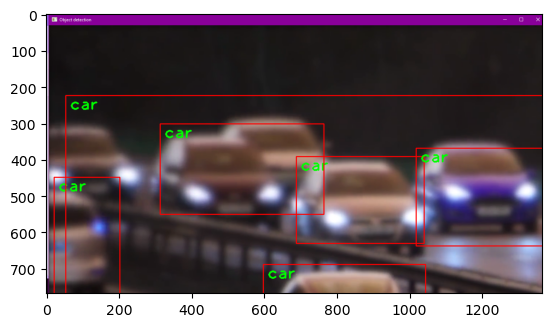

In [39]:
img1=cv2.imread(r"C:\Users\HP\Pictures\Screenshots\Screenshot (13).png")
plt.imshow(img1)